# Polynomial Regression


## Importing the necessary Libraries and Packages

In [1]:
import matplotlib.pyplot as plt  # data plotting
import numpy as np  # data processing
import pandas as pd  # data processing
from joblib import dump  # saving the model
from matplotlib.markers import MarkerStyle  # data plotting
from sklearn.linear_model import LinearRegression  # regression algorithm
from sklearn.metrics import mean_absolute_error  # accuracy metrics
from sklearn.metrics import (mean_absolute_percentage_error,
                             mean_squared_error, r2_score)
from sklearn.preprocessing import PolynomialFeatures  # regression algorithm

## Importing the csv file as DataFrame


In [2]:
df = pd.read_csv('Point_Values.csv')
df.head()

,Points,Values
0,-10.0,-1358
1,-9.5,-1200
2,-9.0,-1000
3,-8.5,-850
4,-8.0,-734


## Exploratory Data Analysis


Formal information about the dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Points  41 non-null     float64
 1   Values  41 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 788.0 bytes


Desciption of the dataset


In [4]:
df.describe()

,Points,Values
count,41.000000,41.000000
mean,0.000000,0.000000
std,5.989574,573.598858
min,-10.000000,-1358.000000
25%,-5.000000,-203.000000
50%,0.000000,0.000000
75%,5.000000,203.000000
max,10.000000,1358.000000


Checking if any null value exists


In [5]:
df.isnull().sum()

Points    0
Values    0
dtype: int64

Columns of the dataset


In [6]:
df.columns

Index(['Points', 'Values'], dtype='object')

Correlations between the variables


In [7]:
df.corr()

,Points,Values
Points,1.000000,0.926989
Values,0.926989,1.000000


## Now taking 2 parts from the dataset

### X: which contains only the <b>Points</b> column<br>Y: which contains only the <b>Values</b> column


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Visualisation of the data


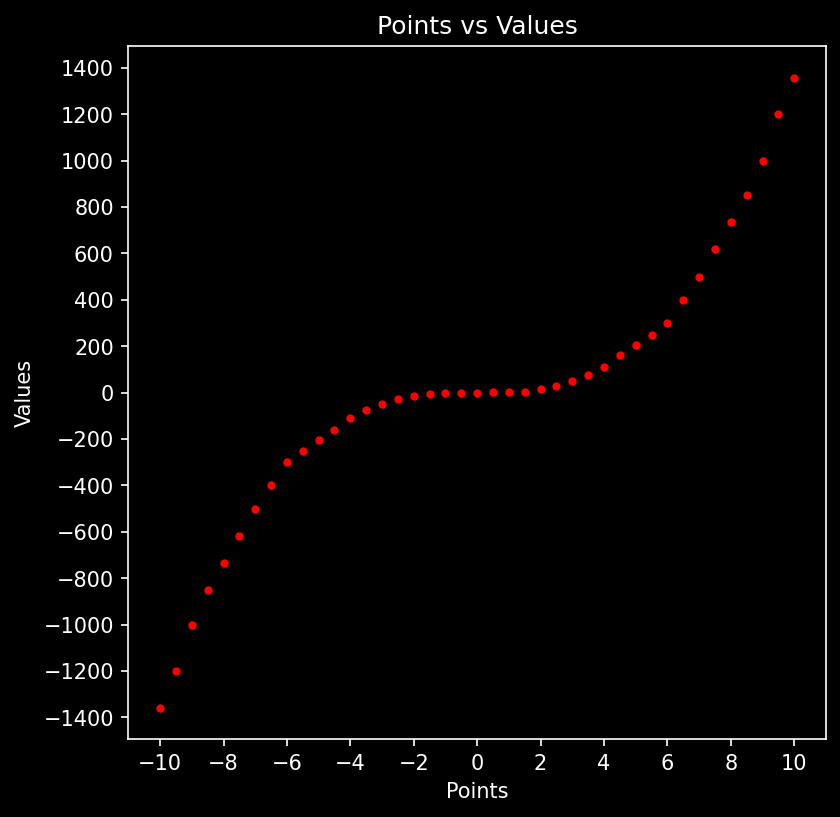

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Points = df['Points']
Values = df['Values']
plt.scatter(Points, Values, marker=MarkerStyle('.'), color='red')
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400, 1500, 200))
plt.title('Points vs Values')
plt.xlabel('Points')
plt.ylabel('Values')
plt.savefig('Images/Points_vs_Values.png', bbox_inches='tight')

## Finding the best degree of n for Polynomial Regression

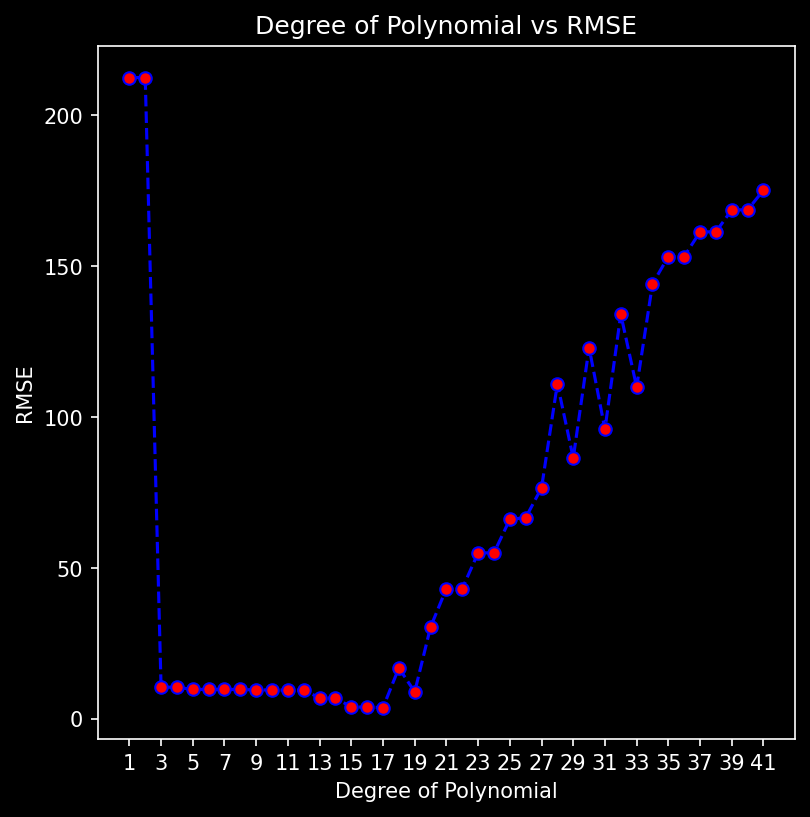

In [10]:
n = X.shape[0]
rmse_val = []
for i in range(1, n+1):
    poly_reg = PolynomialFeatures(degree=i)
    x_poly = poly_reg.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)
    pred = lin_reg.predict(x_poly)
    rmse_val.append(mean_squared_error(y, pred, squared=False))
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.plot(range(1, n+1), rmse_val, linestyle='dashed', color='blue', marker='o', markerfacecolor='red')
plt.xticks(np.arange(1, n+1, 2))
plt.yticks(np.arange(0, 250, 50))
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('Degree of Polynomial vs RMSE')
plt.savefig('Images/Degree_of_Polynomial_vs_RMSE.png', bbox_inches='tight')

## Implementation of the Model

In [11]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)

## Performance of the model


In [12]:
print('The coefficient of determination :', r2_score(y, y_pred))
adjusted_r2_score = 1-((1-r2_score(y, y_pred))*(len(y)-1))/(len(y)-X.shape[1]-1)
print('The adjusted coefficient of determination :', adjusted_r2_score)

The coefficient of determination : 0.9996528537590598
The adjusted coefficient of determination : 0.9996439525733947


## Plotting the Regression


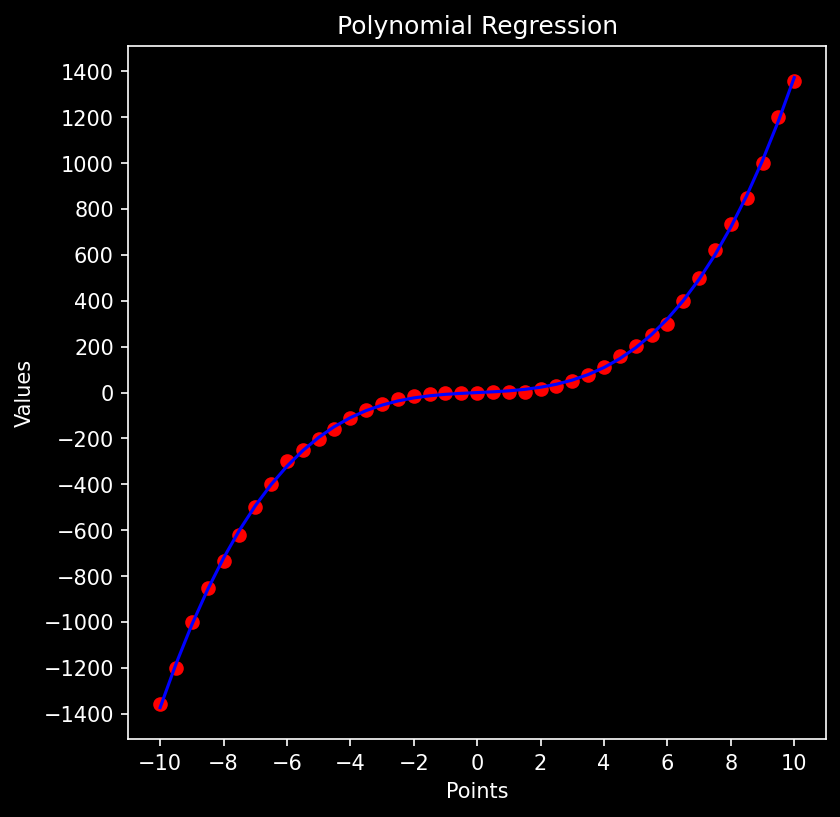

In [13]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400, 1500, 200))
plt.xlabel('Points')
plt.ylabel('Values')
plt.title('Polynomial Regression')
plt.savefig('Images/Polynomial_Regression.png', bbox_inches='tight')

## Additional Performance Metrics


In [14]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE) :', mean_absolute_percentage_error(y, y_pred))

Mean Absolute Error (MAE) : 8.742721696303999
Mean Squared Error (MSE) : 111.4307766907416
Root Mean Squared Error (RMSE) : 10.556077713371648
Mean Absolute Percentage Error (MAPE) : 8.962896238931204


# Saving the Model

In [15]:
dump(lin_reg, 'polynomialRegression.joblib')

['polynomialRegression.joblib']